# fftw3_example

Discrete Fourier transform (DFT) is a widely-used approach of frequency analysis.
DFT is defined by

$$z_k = \frac{1}{N} \sum^{N-1}_{t=0} x_t \exp\left( - \mathrm{i} \frac{2 \pi k t}{N} \right)$$

where $N$ is the number of samples,
$x_t \in \mathbb{C}$ ($t=0,\dots,N-1$) is a series of time-domain samples, and
$z_k \in \mathbb{C}$ ($k=0,\dots,N-1$) is a series of frequency-domain points.
The index $k$ is corresponds to frequency $f_k = f_s k / N$ where $f_s$ is a sample rate,
and absolute value $|z_k|$ is amplitude of $f_k$.

Fast Fourier transform (FFT) is a set of algorithms for efficient computation of DFT.
[FFTW3](http://www.fftw.org/) is a major FFT library faster than similar libraries.
We show a simple example of [fftw3-ocaml](https://github.com/Chris00/fftw-ocaml), a binding to FFTW3.

In [1]:
#thread ;;
#require "fftw3,jupyter.archimedes" ;;

Module Archimedes loaded and aliased as A.


In [2]:
open Bigarray ;;
module FFT = Fftw3.D ;;

module FFT = Fftw3.D


In [3]:
let pi = 3.14159265358979 ;;
let n = 1000 ;; (* # of samples *)

let xdata = Array1.create FFT.complex C_layout n ;; (* source memory for time-domain data *)
let ydata = Array1.create FFT.complex C_layout n ;; (* destination memory for frequency-domain data *)
let plan = FFT.Array1.dft FFT.Forward xdata ydata ;; (* FFTW3 plan *)

val pi : float = 3.14159265358979


val n : int = 1000


val xdata : (Complex.t, FFT.complex_elt, Bigarray.c_layout) Bigarray.Array1.t =
  <abstr>


val ydata : (Complex.t, FFT.complex_elt, Bigarray.c_layout) Bigarray.Array1.t =
  <abstr>


val plan : Fftw3.D.c2c Fftw3.D.plan = <abstr>


## 1. Time-domain input data

This example shows the FFT of the [hamming window](https://en.wikipedia.org/wiki/Window_function#Hamming_window) given by

$$w(x) = 0.54 - 0.46 \cos(2 \pi x).$$

We append zeros at the beginning and the end of the signal for simulation of masking by the window function.

In [4]:
let min = n / 10 in
let max = n - min in
for i = 0 to n - 1 do
  if min <= i && i <= max then begin
    let x = float (i - min) /. float (max - min) in
    let y = 0.54 -. 0.46 *. cos (2.0 *. pi *. x) in  (* the hamming window between `min` and `max` *)
    xdata.{i} <- Complex.({ re = y; im = 0.0; })
  end else begin
    xdata.{i} <- Complex.zero
  end
done

- : unit = ()


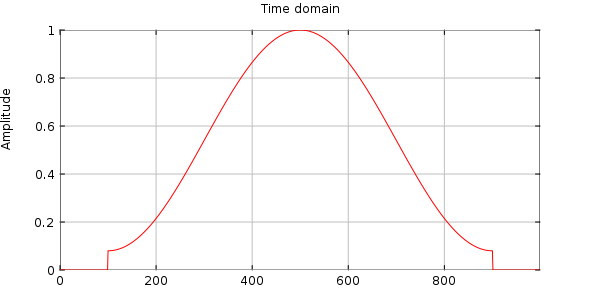

- : unit = ()


In [5]:
let vp = A.init ~w:600. ~h:300. ["jupyter"] in
A.Axes.box vp ;
A.Viewport.title vp "Time domain" ;
A.Viewport.ylabel vp "Amplitude" ;
A.Viewport.yrange vp 0.0 1.0 ;
A.set_color vp A.Color.red ;
A.Array.y vp ~style:`Lines (Array.init n (fun i -> xdata.{i}.Complex.re)) ;
A.close vp

## 2. Frequency-domain series

In [6]:
FFT.exec plan ;; (* Execute FFT *)

- : unit = ()


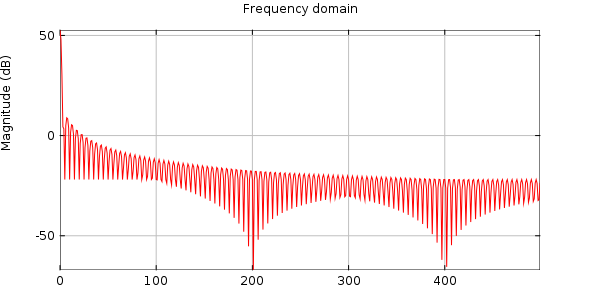

- : unit = ()


In [7]:
let spectrum = Array.init (n / 2) (fun i -> 10. *. log10 (Complex.norm2 ydata.{i})) in

let vp = A.init ~w:600. ~h:300. ["jupyter"] in
A.Axes.box vp ;
A.Viewport.title vp "Frequency domain" ;
A.Viewport.ylabel vp "Magnitude (dB)" ;
A.set_color vp A.Color.red ;
A.Array.y vp ~style:`Lines spectrum ;
A.close vp